In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# For Data Cleaning

raw_train_df = pd.read_csv('train_1.csv')
raw_test_df = pd.read_csv('test_1.csv')
df = pd.concat([raw_train_df, raw_test_df])
df = df.reset_index(drop=True)
display(df)
df.isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

{'Survived': {'A': 0.4666666666666667,
  'B': 0.7446808510638298,
  'C': 0.5932203389830508,
  'D': 0.7575757575757576,
  'E': 0.7575757575757576,
  'F': 0.5833333333333334,
  'G': 0.5,
  'T': 0.0}}

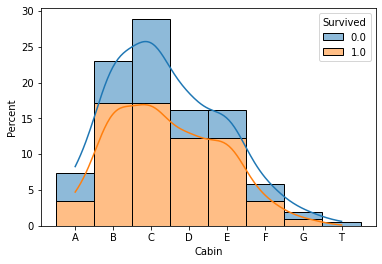

In [3]:
# For Cabin Data, Retain Cabin Class Only

def cabin(x): 
    x = re.sub(r'[^A-Z]','',x)
    if len(x)>1:
        x = min(x)
    return x

temp_df = df[['Survived', 'Cabin']].dropna()
#df_test[df_test['Cabin'].str.contains('[FE]', regex = True)]
temp_df['Cabin'] = temp_df['Cabin'].apply(cabin)
#df_test['Cabin_cat'].unique()
temp_df= temp_df.sort_values(by=['Cabin'])
sns.histplot(temp_df, x = 'Cabin', hue = 'Survived', multiple = 'stack', kde = True, stat = 'percent')
cabin_gb_df= temp_df.groupby('Cabin')
cabin_survival_df = cabin_gb_df.mean()
cabin_survival_dict = cabin_survival_df.to_dict(orient = 'dict')
cabin_survival_dict


In [4]:
#Retain Cabin Class Only 
def cabin_survival(x):
    x = re.sub(r'[^A-Z]','',x)
    if len(x)>1:
        x = min(x)
    x = cabin_survival_dict['Survived'][x] #assign cabin survival rate from previous data
    return x

df['Cabin'].fillna('G', inplace=True)
df['Cabin_survival']=df['Cabin'].apply(cabin_survival)
df[['Cabin_survival']].head()

,Cabin_survival
0,0.50000
1,0.59322
2,0.50000
3,0.59322
4,0.50000


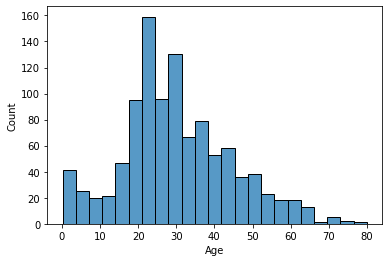

In [5]:
# Missing Age and Ports

sns.histplot(df, x = 'Age');
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [6]:
df[df['Embarked'].isnull()]
df.dropna(subset=['Embarked'], inplace=True)
df.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin               0
Embarked            0
Cabin_survival      0
dtype: int64

In [7]:
display(df[df['Fare'].isnull()])

temp_df = df.groupby(['Pclass','Embarked']).mean()
meanfare = temp_df.iloc[8,5]
display(temp_df)
print('Mean Fare for 3rd class and Southampton' ,meanfare)
df['Fare'].fillna(meanfare, inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_survival
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,G,S,0.5


PassengerId  Survived        Age     SibSp     Parch  \
Pclass Embarked                                                         
1      C          700.702128  0.694118  38.215991  0.397163  0.368794   
       Q          654.000000  0.500000  38.000000  1.333333  0.000000   
       S          652.892655  0.582677  37.764574  0.457627  0.372881   
2      C          707.571429  0.529412  24.536591  0.500000  0.428571   
       Q          731.000000  0.666667  43.537468  0.000000  0.000000   
       S          665.681818  0.463415  29.700667  0.392562  0.371901   
3      C          671.940594  0.378788  24.871749  0.376238  0.356436   
       Q          665.115044  0.375000  28.266025  0.336283  0.123894   
       S          628.549495  0.189802  26.145796  0.660606  0.472727   

                       Fare  Cabin_survival  
Pclass Embarked                              
1      C         106.845330        0.629360  
       Q          90.000000        0.593220  
       S          72.148094        0.632687  
2      C          23.300593        0.536797  
       Q          11.735114        0.536797  
       S          21.206921        0.509798  
3      C          11.021624        0.507651  
       Q          10.390820        0.500737  
       S          14.435422        0.502234

Mean Fare for 3rd class and Southampton 14.435422064777327


In [8]:
df.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin               0
Embarked            0
Cabin_survival      0
dtype: int64

In [9]:
# Removing Outliers

def remove_outliers(df, col, cond):
    Q3 = np.quantile(df[cond][col], 0.75)
    Q1 = np.quantile(df[cond][col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    Q2 = np.mean(df[cond][col])

    print(f'IQR value for {col} is {IQR}')
    print(f'Lower range is {lower_range}')
    print(f'Upper range is {upper_range}')
    print(f'Mean is {Q2}')

    cond2 = (df[col] < lower_range)
    cond3 = (df[col] > upper_range)

    outliers_cond = (cond&cond3)|(cond&cond3)
    outlier_id = df[outliers_cond]['PassengerId'].to_list()
    print('PassengerIds with outliers',outlier_id)
    print()
    df.loc[outlier_id,col]=Q2
    return

df.set_index('PassengerId', drop=False ,inplace=True)

#remove_outliers(df, 'Fare', (df['Pclass']==1))
#remove_outliers(df, 'Fare', (df['Pclass']==2))
#remove_outliers(df, 'Fare', (df['Pclass']==3))

remove_outliers(df, 'Fare', (df['Survived']==0))
remove_outliers(df, 'Fare', (df['Survived']==1))


IQR value for Fare is 18.1458
Lower range is -19.364500000000003
Upper range is 53.2187
Mean is 22.117886885245877
PassengerIds with outliers [28, 35, 55, 63, 73, 93, 103, 119, 121, 125, 140, 156, 160, 170, 181, 202, 246, 263, 298, 325, 333, 337, 374, 378, 386, 435, 439, 499, 506, 528, 545, 558, 656, 660, 666, 699, 742, 746, 790, 793, 827, 847, 864]

IQR value for Fare is 44.50315
Lower range is -54.31097499999999
Upper range is 123.70162499999999
Mean is 48.209498235294106
PassengerIds with outliers [32, 89, 196, 259, 269, 270, 300, 306, 312, 319, 320, 326, 335, 338, 342, 381, 610, 661, 680, 690, 701, 709, 717, 731, 738, 743, 780, 857]



In [10]:
# Name and Status Survival

df['Last Name'] = df.Name.apply(lambda x: x.split(',')[0].lower())
df['Status'] = df.Name.apply(lambda x: x.split(',')[1].lower().split('.')[0])

mapping = {' mlle': 'miss', ' major': 'mr', ' mol': 'mr', ' sir': 'mr', ' don': 'mr', ' mme': 'miss',
          ' jonkheer': 'mr', ' lady': 'mrs', ' capt': 'mr', ' the countess': 'mrs', ' ms': 'miss', 
           ' dona': 'mrs', ' mr':'mr', ' mrs':'mrs', ' miss':'miss', ' col':'mr',' dr':'mr'}
df.replace({'Status': mapping}, inplace=True)

Percentage %
         Survived
Status           
 master  0.575000
 rev          NaN
miss     0.702703
mr       0.163534
mrs      0.793651



<AxesSubplot:xlabel='Status', ylabel='Count'>

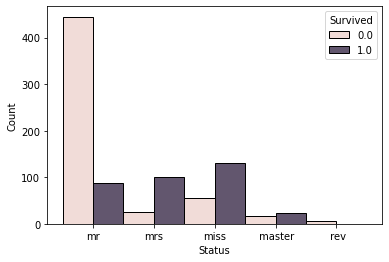

In [11]:
cond = (df['Survived']==1)
survived = df[cond].groupby('Status').count()

print('Percentage %')
status_survival = survived[['Survived']] / df.groupby('Status')[['Survived']].count()
print(status_survival)
print()

sns.histplot(df, x = 'Status', hue = 'Survived', multiple = 'dodge')

In [12]:
cond_family = (df['SibSp']>0) | (df['Parch']>0)
gb = (df[cond_family].groupby('Last Name')['Survived'].count())/(df[cond_family].groupby('Last Name')['Name'].count())

#gb = (df.groupby('Last Name')['Survived'].count())/(df.groupby('Last Name')['Name'].count())
gb = gb.to_frame().reset_index()
cond_survivor = (gb.iloc[:,1]==1)
survivor_names = gb[cond_survivor]['Last Name'].to_list()
print('List of survivor names with family \n')
print(survivor_names)

List of survivor names with family 

['abelson', 'ahlin', 'andersen-jensen', 'andrews', 'appleton', 'arnold-franchi', 'backstrom', 'baclini', 'barbara', 'baxter', 'beane', 'beckwith', 'bishop', 'bourke', 'bowerman', 'braund', 'carter', 'chambers', 'chibnall', 'collyer', 'dick', 'doling', 'duff gordon', 'eustis', 'frolicher', 'futrelle', 'goldenberg', 'goldsmith', 'graham', 'gustafsson', 'hagland', 'hakkarainen', 'hamalainen', 'harper', 'harris', 'hart', 'hickman', 'hippach', 'hogeboom', 'holverson', 'hoyt', 'jacobsohn', 'jensen', 'johnson', 'jussila', 'kantor', 'lindqvist', 'lobb', 'madill', 'mellinger', 'meyer', 'moor', 'moran', 'murphy', 'nasser', 'natsch', 'navratil', 'newell', 'newsom', 'nicholls', 'nicola-yarred', "o'brien", 'panula', 'parrish', 'pears', 'penasco y castellana', 'persson', 'petterson', 'potter', 'renouf', 'richards', 'robert', 'shelley', 'silven', 'silvey', 'skoog', 'stephenson', 'strom', 'taussig', 'taylor', 'thayer', 'thorneycroft', 'turpin', 'van impe', 'white',

In [13]:
df['Name_survival'] = df[cond_family]['Last Name'].apply(lambda x: 1 if x in survivor_names else 0.5)
df['Name_survival'].fillna(0.5, inplace=True)
df[cond_family][['Last Name','Name_survival']].head()

,Last Name,Name_survival
PassengerId,,
1,braund,1.0
2,cumings,0.5
4,futrelle,1.0
8,palsson,0.5
9,johnson,1.0


In [14]:
clean_df = df.drop(['PassengerId','Ticket','Name','Cabin','SibSp','Parch','Last Name','Name_survival'],axis = 1)
clean_df.reset_index(drop = True, inplace=True)
clean_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_survival,Status
0,0.0,3,male,22.000000,7.2500,S,0.50000,mr
1,1.0,1,female,38.000000,71.2833,C,0.59322,mrs
2,1.0,3,female,26.000000,7.9250,S,0.50000,miss
3,1.0,1,female,35.000000,53.1000,S,0.59322,mrs
4,0.0,3,male,35.000000,8.0500,S,0.50000,mr
...,...,...,...,...,...,...,...,...
1302,NaN,3,male,29.881138,8.0500,S,0.50000,mr
1303,NaN,1,female,39.000000,108.9000,C,0.59322,mrs
1304,NaN,3,male,38.500000,7.2500,S,0.50000,mr
1305,NaN,3,male,29.881138,8.0500,S,0.50000,mr


In [15]:
# Preprocessing; sex will be defaulted to male

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
encoded = pd.DataFrame(enc.fit_transform(clean_df[['Sex','Embarked','Status']]).toarray())
display(enc.get_feature_names())
encoded.columns = ['Female','Male','Cherbourg','Queenstown','Southampton','Master','Rev','Miss','Mr','Mrs']
encoded = encoded.drop(['Male'],axis = 1) #default gender 0 will be male
encoded

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S', 'x2_ master',
       'x2_ rev', 'x2_miss', 'x2_mr', 'x2_mrs'], dtype=object)

,Female,Cherbourg,Queenstown,Southampton,Master,Rev,Miss,Mr,Mrs
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1302,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1303,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1304,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
clean_df = clean_df.join(encoded)
clean_df = clean_df.drop(['Sex','Embarked','Status'],axis = 1)
#clean_df['Pclass'] = clean_df['Pclass']-1 #all classes -1 to account for 0-1 error
#clean_df['Pclass'].astype(int)
clean_df

,Survived,Pclass,Age,Fare,Cabin_survival,Female,Cherbourg,Queenstown,Southampton,Master,Rev,Miss,Mr,Mrs
0,0.0,3,22.000000,7.2500,0.50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1,38.000000,71.2833,0.59322,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3,26.000000,7.9250,0.50000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1,35.000000,53.1000,0.59322,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3,35.000000,8.0500,0.50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,NaN,3,29.881138,8.0500,0.50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1303,NaN,1,39.000000,108.9000,0.59322,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1304,NaN,3,38.500000,7.2500,0.50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1305,NaN,3,29.881138,8.0500,0.50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
training_set = clean_df['Survived'].isnull()==False 
train_df = clean_df[training_set]
train_df['Survived'] = train_df['Survived'].astype(int)
print('Train data')
display(train_df)

print()

testing_set = clean_df['Survived'].isnull()
test_df = clean_df[testing_set]
test_df = test_df.drop('Survived', axis = 1)
print('Test data')
test_df

Train data


,Survived,Pclass,Age,Fare,Cabin_survival,Female,Cherbourg,Queenstown,Southampton,Master,Rev,Miss,Mr,Mrs
0,0,3,22.000000,7.2500,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,1,38.000000,71.2833,0.593220,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,3,26.000000,7.9250,0.500000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,1,35.000000,53.1000,0.593220,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,8.0500,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,27.000000,13.0000,0.500000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
885,1,1,19.000000,30.0000,0.744681,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
886,0,3,29.881138,23.4500,0.500000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
887,1,1,26.000000,30.0000,0.593220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0



Test data


,Pclass,Age,Fare,Cabin_survival,Female,Cherbourg,Queenstown,Southampton,Master,Rev,Miss,Mr,Mrs
889,3,34.500000,7.8292,0.50000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
890,3,47.000000,7.0000,0.50000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
891,2,62.000000,9.6875,0.50000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
892,3,27.000000,8.6625,0.50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
893,3,22.000000,12.2875,0.50000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,29.881138,8.0500,0.50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1303,1,39.000000,108.9000,0.59322,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1304,3,38.500000,7.2500,0.50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1305,3,29.881138,8.0500,0.50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# EDA of the training data

train_df.corr().style.background_gradient()
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sibsp	of siblings / spouses aboard the Titanic
#parch	of parents / children aboard the Titanic

,Survived,Pclass,Age,Fare,Cabin_survival,Female,Cherbourg,Queenstown,Southampton,Master,Rev,Miss,Mr,Mrs
Survived,1.000000,-0.335549,-0.075181,0.423363,0.313915,0.541585,0.169966,0.004536,-0.151777,0.085998,-0.064871,0.337805,-0.549895,0.343836
Pclass,-0.335549,1.000000,-0.326982,-0.651443,-0.599176,-0.127741,-0.245733,0.220558,0.076466,0.081547,-0.030788,-0.012102,0.091419,-0.155646
Age,-0.075181,-0.326982,1.000000,0.085558,0.196355,-0.089733,0.034036,-0.010932,-0.022940,-0.378217,0.085711,-0.251383,0.236398,0.164993
Fare,0.423363,-0.651443,0.085558,1.000000,0.513908,0.293111,0.261476,-0.149130,-0.135224,0.085570,-0.016804,0.124124,-0.318386,0.256120
Cabin_survival,0.313915,-0.599176,0.196355,0.513908,1.000000,0.161345,0.187999,-0.109642,-0.095702,-0.043573,-0.035866,0.078490,-0.126845,0.121246
Female,0.541585,-0.127741,-0.089733,0.293111,0.161345,1.000000,0.084520,0.075217,-0.121405,-0.159612,-0.060616,0.697124,-0.892851,0.552629
Cherbourg,0.169966,-0.245733,0.034036,0.261476,0.187999,0.084520,1.000000,-0.148646,-0.782613,-0.035471,-0.039791,0.042746,-0.061751,0.067462
Queenstown,0.004536,0.220558,-0.010932,-0.149130,-0.109642,0.075217,-0.148646,1.000000,-0.499261,0.010330,0.023461,0.167244,-0.082223,-0.090739
Southampton,-0.151777,0.076466,-0.022940,-0.135224,-0.095702,-0.121405,-0.782613,-0.499261,1.000000,0.024577,0.020095,-0.142734,0.105865,-0.001989
Master,0.085998,0.081547,-0.378217,0.085570,-0.043573,-0.159612,-0.035471,0.010330,0.024577,1.000000,-0.017893,-0.111269,-0.264971,-0.088206


In [19]:
def survival(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'

def pclass(x):
    if x == 1:
        return '1st Class'
    elif x == 2:
        return '2nd Class'
    else:
        return '3rd Class'
    
cat_df = raw_train_df
cat_df['Pclass'] = raw_train_df['Pclass'].apply(pclass)
cat_df['Survived'] = raw_train_df['Survived'].apply(survival)

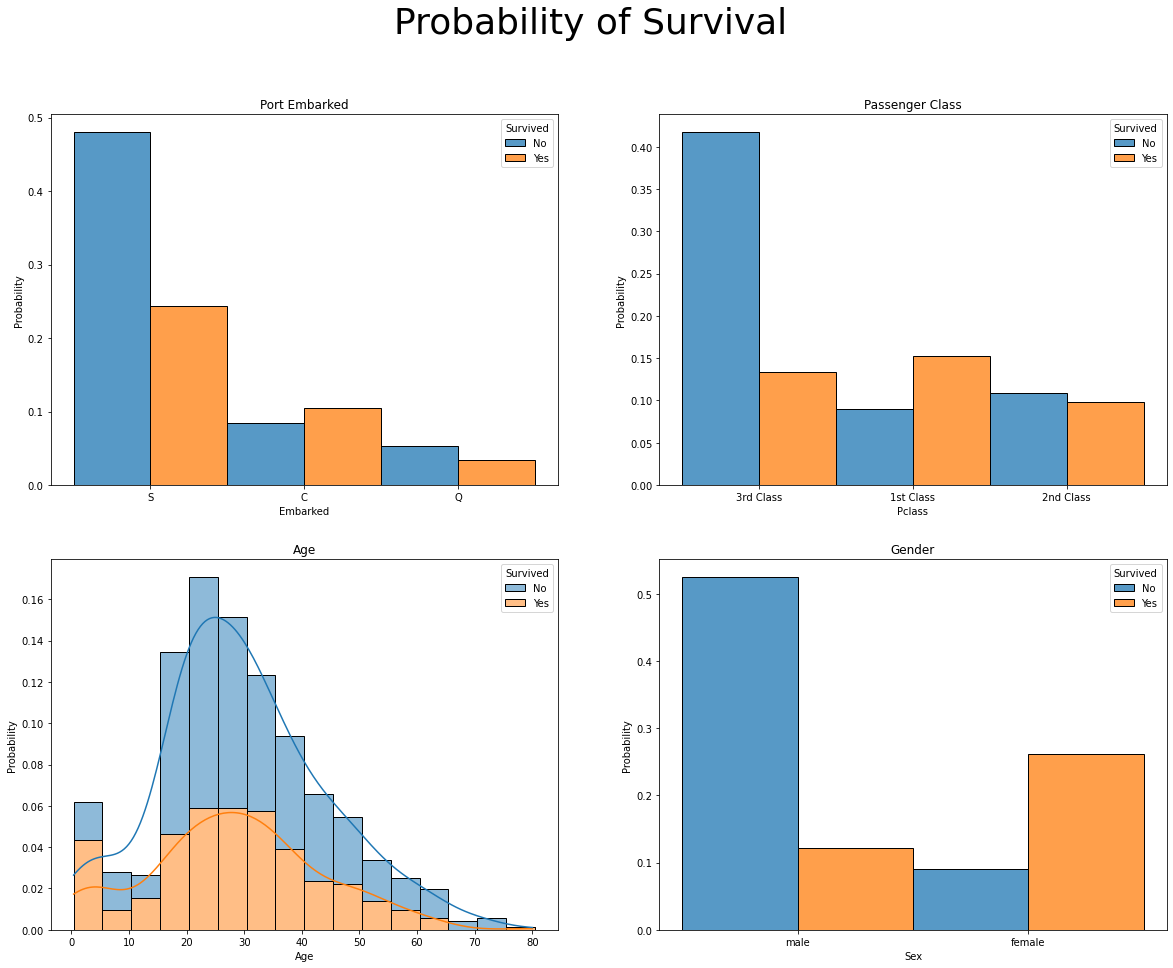

In [20]:
fig = plt.figure(figsize=(20,15))
plt.suptitle("Probability of Survival", fontsize = 36)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.title.set_text('Port Embarked')
sns.histplot(cat_df, x='Embarked', hue = 'Survived', multiple = 'dodge', stat='probability', ax = ax1)

ax2.title.set_text('Passenger Class')
sns.histplot(cat_df, x = 'Pclass', hue = 'Survived', multiple = 'dodge', stat='probability', ax = ax2)

ax3.title.set_text('Age')
sns.histplot(raw_train_df, x = 'Age', hue = 'Survived', multiple = 'stack', binwidth = 5, kde=True, stat='probability', ax = ax3)

ax4.title.set_text('Gender')
sns.histplot(raw_train_df, x = 'Sex', hue = 'Survived', multiple = 'dodge', stat='probability', ax = ax4)
plt.show()

In [21]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

X = train_df.drop('Survived',axis = 1)
y = train_df[['Survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

depths = [3,6,9,12,15]

for n in depths:
    clf = DecisionTreeClassifier(max_depth = n, random_state=42)
    clf.fit(X_train, y_train)
    
    print('Max depth', clf.tree_.max_depth)
    prediction = clf.predict(X_test)
    print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test, prediction)))
    print('Precision score: {0:0.4f}'.format(precision_score(y_test, prediction)))
    print(confusion_matrix(y_test, prediction))
    print()
    feature_names= X.columns.to_list()
    importances = clf.feature_importances_
    
    i = 0
    while i < len(feature_names):
        print('Feature importance:',feature_names[i], round(importances[i],2)*100, '%')
        i +=1
    print()

Max depth 3
Model accuracy: 0.8163
Precision score: 0.7373
[[153  31]
 [ 23  87]]

Feature importance: Pclass 16.0 %
Feature importance: Age 0.0 %
Feature importance: Fare 22.0 %
Feature importance: Cabin_survival 4.0 %
Feature importance: Female 0.0 %
Feature importance: Cherbourg 0.0 %
Feature importance: Queenstown 0.0 %
Feature importance: Southampton 0.0 %
Feature importance: Master 0.0 %
Feature importance: Rev 3.0 %
Feature importance: Miss 0.0 %
Feature importance: Mr 53.0 %
Feature importance: Mrs 0.0 %

Max depth 6
Model accuracy: 0.8231
Precision score: 0.7900
[[163  21]
 [ 31  79]]

Feature importance: Pclass 13.0 %
Feature importance: Age 8.0 %
Feature importance: Fare 25.0 %
Feature importance: Cabin_survival 4.0 %
Feature importance: Female 1.0 %
Feature importance: Cherbourg 0.0 %
Feature importance: Queenstown 0.0 %
Feature importance: Southampton 2.0 %
Feature importance: Master 0.0 %
Feature importance: Rev 3.0 %
Feature importance: Miss 2.0 %
Feature importance: Mr 

In [22]:
# Random Forest Classifier
#library preparation
from sklearn.ensemble import RandomForestClassifier

depths = [3,5,7]

#for loops for X-train and y_train
for n in depths:
    rf_clf = RandomForestClassifier(max_depth = n, random_state=42)
    rf_clf.fit(X_train, y_train)
    
#for the display of the values
    print('Max depth', n)
    prediction = rf_clf.predict(X_test)
    print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test, prediction)))
    print('Precision score: {0:0.4f}'.format(precision_score(y_test, prediction)))
    print(confusion_matrix(y_test, prediction))
    print()
    feature_names= X.columns.to_list()
    importances = rf_clf.feature_importances_
    
    #while loop for feature importance
    i = 0
    while i < len(feature_names):
        print('Feature importance:',feature_names[i], round(importances[i],2)*100, '%')
        i +=1
    print()

Max depth 3
Model accuracy: 0.8231
Precision score: 0.7788
[[161  23]
 [ 29  81]]

Feature importance: Pclass 10.0 %
Feature importance: Age 3.0 %
Feature importance: Fare 19.0 %
Feature importance: Cabin_survival 6.0 %
Feature importance: Female 27.0 %
Feature importance: Cherbourg 1.0 %
Feature importance: Queenstown 0.0 %
Feature importance: Southampton 1.0 %
Feature importance: Master 1.0 %
Feature importance: Rev 0.0 %
Feature importance: Miss 5.0 %
Feature importance: Mr 20.0 %
Feature importance: Mrs 6.0 %

Max depth 5
Model accuracy: 0.8367
Precision score: 0.8229
[[167  17]
 [ 31  79]]

Feature importance: Pclass 11.0 %
Feature importance: Age 7.000000000000001 %
Feature importance: Fare 21.0 %
Feature importance: Cabin_survival 6.0 %
Feature importance: Female 23.0 %
Feature importance: Cherbourg 1.0 %
Feature importance: Queenstown 1.0 %
Feature importance: Southampton 2.0 %
Feature importance: Master 2.0 %
Feature importance: Rev 0.0 %
Feature importance: Miss 5.0 %
Feature

In [23]:
#For Neural Network

In [ ]:
#Load packages and data
#Import Libraries

mport numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
from tensorflow import set_random_seed



#Failed Neural Network
#No fit dataset

#Comparison Analysis and Conclusion

#Comparison
It can be observed that the value of  model accuracy of each run is greater than its precision score.Between the two machine learning approaches, as observed, Random Forest Classifier exhibits higher model accuracy than the Decision Tree.It was also observed that in the 5 runs of Decision Tree, its average model accuracy is around 81.2% while the average model accuracy of the Random Forest approach  is around 82.8., which is a little higher than the former.

#Analysis
In this activity, according to the results,Random Forest approach is the better machine learning approach due the accuracy it has exhibited. Although the difference here is seemingly insignificant, higher accuracy is still needed in programs like this.Random Forest approach produces higher accuracy however, it also requires a much more complex coding.Random Forest is much more complex because it utilizes a for loop in its coding.

Conclusion
I therefore conclude that in achieving higer accuracy, the usage of the Random Forest would be of great help compared tothe decision tree approach.It is also concluded that features of the data affects the survival factor.It was also recommended to remove unecessary columns and data, which are not needed in the testing and training foritmay affect the accuracy of the model being used. I was also amazed that the prediction may be applied to this kind of scenario "The titanic (survival prediction)" 